# Cohen-Bergstresser model

This example considers the Cohen-Bergstresser model[^CB1966],
reproducing the results of the original paper. This model is particularly
simple since its linear nature allows one to get away without any
self-consistent field calculation.

[^CB1966]: M. L. Cohen and T. K. Bergstresser Phys. Rev. **141**, 789 (1966) DOI [10.1103/PhysRev.141.789](https://doi.org/10.1103/PhysRev.141.789)

We build the lattice using the tabulated lattice constant from the original paper,
stored in DFTK:

In [1]:
using DFTK

Si = ElementCohenBergstresser(:Si)
lattice = Si.lattice_constant / 2 .* [[0 1 1.]; [1 0 1.]; [1 1 0.]]
atoms = [Si => [ones(3)/8, -ones(3)/8]];

Next we build the rather simple model and discretise it with moderate `Ecut`:

In [2]:
Ecut = 10.0
model = Model(lattice; atoms=atoms, terms=[Kinetic(), AtomicLocal()])
basis = PlaneWaveBasis(model, Ecut, kgrid=(1, 1, 1));

We diagonalise at the Gamma point to find a Fermi level ...

In [3]:
ham = Hamiltonian(basis)
eigres = diagonalize_all_kblocks(DFTK.lobpcg_hyper, ham, 6)
εF = DFTK.fermi_level(basis, eigres.λ)

0.3842999767137577

... and compute and plot 8 bands:

Computing bands along kpath:
       Γ -> X -> W -> K -> Γ -> L -> U -> W -> L -> K  and  U -> X
Diagonalising Hamiltonian kblocks: 100%|████████████████| Time: 0:00:02


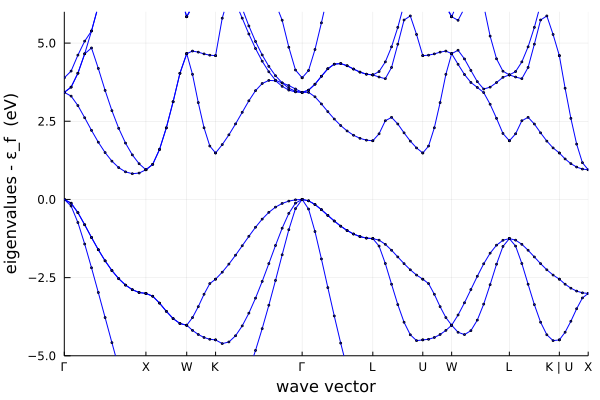

In [4]:
using Plots

n_bands = 8
ρ0 = guess_density(basis)  # Just dummy, has no meaning in this model
p = plot_bandstructure(basis, ρ0, n_bands, εF=εF, kline_density=10)
ylims!(p, (-5, 6))